RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

tf.random.set_seed(42)

In [ ]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [ ]:
x_data = np.array([[h]], dtype=np.float32)
x_data

array([[[1., 0., 0., 0.]]], dtype=float32)

In [ ]:
x_data.shape 

(1, 1, 4)

In [ ]:
#하나의 RNN 층: (batch size, input_length, input dim) 크기의 3D 텐서 입력으로 받음
#RNN층이 은닉상태 출력하는 방법 - '목적' 차이
#1.return_sequences=T: 셀 각 시점의 은닉 상태값들 모아서 전체 시퀀스(3D) 리턴 ex.토마토 라벨
#2.F: 마지막 시점의 셀 은닉상태 값: (batch size, output dim) 크기의 2D 텐서 리턴 ex.감성분석

#batch size: 한번에 학습하는 데이터 개수
#input_length: 입력 시퀀스의 길이 =timesteps
#input_dim: 입력의 크기

x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data.shape) #샘플 사이즈, 워드의 개수, 임베딩 사이즈
x_data

(1, 5, 4)


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)

In [ ]:
hidden_size = 2 #은닉 상태의 크기 정의 - output dim과도 동일
cell = layers.SimpleRNNCell(hidden_size) #units: output space의 차원 = hidden_size
rnn = layers.RNN(cell, return_sequences=True, return_state=True) #return sequence - T: 전체 반환, return state: 마지막 상태를 반환
outputs, state = rnn(x_data)
print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape)) #input
print('outputs : {}  \t\t\tshape : {}'.format(outputs, outputs.shape)) #hidden을 2로 뒀더니 (1,5,2)
print('state : {} \t\t\tshape : {}'.format(state, state.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] 			shape : (1, 5, 4)
outputs : [[[ 0.44843182  0.251574  ]
  [-0.42299843 -0.3193183 ]
  [-0.46304917 -0.15422161]
  [-0.43075916 -0.3099445 ]
  [-0.8806396  -0.7064807 ]]]  			shape : (1, 5, 2)
state : [[-0.8806396 -0.7064807]] 			shape : (1, 2)


RNN - 교안 p.38 그림 구현

In [ ]:
x_data = np.array([[h, e, l, l, o], [e, o, l, l, l], [l, l, e, e, l]], dtype=np.float32)
print(x_data.shape)
x_data

(3, 5, 4)


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [ ]:
# RNN 만들기
hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True) #units = output으로 내는 차원
outputs, state = rnn(x_data)

#input: (3,5,4)
print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape))
#outputs: (3,5,2)
print('outputs : {}  \t\t\tshape : {}'.format(outputs, outputs.shape))
#hidden_state의 차원: (3,2) -> 원래는 (1,2)짜리 인데 그게 샘플사이즈 3만큼 있는 것!!
print('state : {} \t\t\tshape : {}'.format(state, state.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]] 			shape : (3, 5, 4)
outputs : [[[ 0.54152584 -0.00444528]
  [-0.24527906  0.8775963 ]
  [ 0.81667423 -0.71729445]
  [-0.39880705  0.19528541]
  [ 0.43131363 -0.69072646]]

 [[-0.25328436  0.6770975 ]
  [ 0.73827225 -0.614059  ]
  [-0.31032306  0.11644185]
  [ 0.36639637 -0.7392534 ]
  [-0.42597967 -0.24660602]]

 [[ 0.26853478 -0.56203717]
  [-0.27304867 -0.3398094 ]
  [-0.54072225  0.50716776]
  [ 0.23090217  0.26456586]
  [ 0.4969957  -0.38958573]]]  			shape : (3, 5, 2)
state : [[ 0.43131363 -0.69072646]
 [-0.42597967 -0.24660602]
 [ 0.4969957  -0.38958573]] 			shape : (3, 2)


토마토 RNN 실습

In [ ]:
idx2char = ['토', '마', '를', '먹', '자']

#이 모델은 '토토마를자먹'을 '토마토를먹자'로 예측하는 것, so 다른 데이터를 넣었을 때 '토마토를먹자'로 나오게 하려면 다르게 학습시켜야 함
x_data = [[0, 0, 1, 2, 4, 3]] #토 토 마 를 자 먹 -> 6개의 cell
y_data = [[0, 1, 0, 2, 3, 4]] #토 마 토 를 먹 자 = 각 타임 seq의 label : 이 라벨에 최대한 가깝게 학습해라!

num_class = 5 #클래스 개수 - 5개 중에 하나 맞히는 것 ('토,마,를,먹,자')
input_dim = 5 #word embedding dimension
sequence_length = 6 #총 6글자 와야 함
learning_rate = 0.1

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_class) #5개중에 x_data 받아서 원핫
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_class)

x_one_hot, y_one_hot
#x_one_hot: 토,토,마,를,자,먹 -> 원핫 결과

(array([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0.]]], dtype=float32), array([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]], dtype=float32))

In [ ]:
x_one_hot.shape, y_one_hot.shape
#1: batch size, sample 개수
#6: sequence length(문장의 길이) - 문장 이루는 단어 개수, 입력 개수
#5: 입력 차원, hidden size

((1, 6, 5), (1, 6, 5))

In [ ]:
#model 만들기
model = tf.keras.Sequential()
cell = layers.SimpleRNNCell(units=5, input_shape=(sequence_length, input_dim)) #units: output space의 차원
model.add(layers.RNN(cell=cell, return_sequences=True, return_state=False, input_shape=(sequence_length, input_dim)))
#TimeDistributed: 각 time step에서 cost 계산
model.add(layers.TimeDistributed(layers.Dense(units=num_class, activation='softmax')))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
#param 의미 : 25 + 25 + 5(bias)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_4 (RNN)                 (None, 6, 5)              55        
                                                                 
 time_distributed_2 (TimeDis  (None, 6, 5)             30        
 tributed)                                                       
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#훈련
model.fit(x_one_hot, y_one_hot, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 723ms/step - loss: 2.1464 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 1.6396 - accuracy: 0.1667
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1.3825 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 1.1967 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 1.0239 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.8470 - accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6674 - accuracy: 0.8333
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.5185 - accuracy: 0.8333
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4110 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3269 - accuracy: 1.0000


In [ ]:
pred = model.predict(x_one_hot)
pred

array([[[0.5780471 , 0.26154292, 0.0147015 , 0.0601517 , 0.08555677],
        [0.27004823, 0.6329808 , 0.01370101, 0.02730631, 0.05596367],
        [0.93619776, 0.03618934, 0.00871874, 0.00356569, 0.01532855],
        [0.02501903, 0.0030639 , 0.86514443, 0.10152366, 0.00524894],
        [0.02060313, 0.00233209, 0.11670709, 0.8221066 , 0.03825116],
        [0.06601167, 0.00831936, 0.01431147, 0.02323857, 0.8881189 ]]],
      dtype=float32)

In [ ]:
pred.shape

(1, 6, 5)

In [ ]:
#확률값과 label 매칭 - argmax 사용
for i, word in enumerate(pred):
  print(" ".join([idx2char[c] for c in np.argmax(word, axis=1)])) #한 열마다 가장 높은 것 뽑기 위해 axis=1

토 마 토 를 먹 자


문장 RNN

In [ ]:
#말뭉치: 문장마다 길이 다른 문제 - 가장 긴 문장 기준; 짧은 문장은 나머지를 padding으로 채워서 입력 사이즈 맞춰주고 계산은 안함
#truncate : preprocessing.text; 너무 길면 메모리 낭비되므로 어느정도에서 잘라버림
#Tokenizer: vocab 만들어주는 것
#countvectorizer를 tensor로 만드는 과정

from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['i love my dog', 'I love my cat', 'You love my dog!']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index) #단어 아닌 것 제거

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

#one-hot encoding 형태로 만들기 위해 단어의 index 가져옴
#padding:0으로 정해져 있음
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [ ]:
#뒤에 0으로 padding -> pad 때문에 인덱스 0에서 시작
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post') #대부분이 4라면 4에서 절삭
print(padded)

[[4 2 1 3 0]
 [4 2 1 6 0]
 [5 2 1 3 0]
 [7 5 8 1 3]]


In [ ]:
# oov
from tensorflow.keras.preprocessing.sequence import pad_sequences

#말뭉치 가져와서 인덱스 자동으로 읽어주는 것
sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer(oov_token="<oov>") #등장하지 않는 단어들은 oov로 치환
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
#padding: 짧은 것들 0으로 채워주는 것
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post') #대부분이 4라면 4에서 절삭
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


In [ ]:
test_data = ['i really love my dog', 'my dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq, maxlen=5, padding='post', truncating='post') #대부분이 4라면 4에서 절삭
print(padded)

[[5 1 3 2 4]
 [2 4 1 2 1]]


영화 리뷰

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.random.set_seed(42)

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
#문장의 리스트 만들기
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

for s, l in train_data:
  train_sentences.append(s.numpy().decode('utf-8'))
  train_labels.append(l.numpy())

for s, l in test_data:
  test_sentences.append(s.numpy().decode('utf-8'))
  test_labels.append(l.numpy())

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
#25,000문장 & 첫번째 문장의 길이가 116
len(train_sentences), len(train_sentences[0].split())

(25000, 116)

In [ ]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
len(test_sentences), len(test_sentences[0])

(25000, 939)

In [ ]:
test_sentences[0]

"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120 #단어 120개 넘어가면 자르기
trunc_type = 'post' #EDA 필요
oov_tok = '<oov>' #말뭉치에 단어사전에 없는 단어가 있다면 oov로 치환

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [ ]:
word_index = tokenizer.word_index
#숫자의 배열 - sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
#max_len만큼 문장 길이 통일
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
#index, word 형태로 들어가도록 word_index를 switch
index_word = {value : key for (key, value) in word_index.items()} #단어사전 key, value
index_word[1] #oov 토큰 넣어줬으니까
#index_word[0] : error -> 내부적으로 사용하는거라 단어사전에 0은 없음. but 0 = padding

'<oov>'

In [ ]:
padded[0] #padding=pre로 했으니까 앞에 채워줌

array([   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
          1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
        154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
         58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
         12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
       1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
       2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
        117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
          9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
        242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
       1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10],
      dtype=int32)

In [ ]:
#padding을 위한 함수 - 사람이 읽을 수 있도록 decode
def decode_review(text):
  #dic의 get메서드: (i, '?') => i가 없으면 ?로 내보내라 ~ 빈자리 채워주기
  return " ".join([index_word.get(i, '?') for i in text])

In [ ]:
decode_review(padded[0]) #padded된 것은 ?로 나왔음, 사전에 없는 단어는 oov
#why? 단어의 수 너무 크면 맞히는 확률 너무 낮아지므로 단어의 종류 작게 주는 것

"? ? ? this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it"

In [ ]:
train_sentences[0] #원문

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
#훈련
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
#input: vocab_size, output: embedding_dim, input_length: embedding layer 개수
#embedding으로 16차원 벡터 만들기 - CNN rand 방법
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
#GlobalAveragePooling: max가 아니라 global average로 풀링 => 풀링이므로 파라미터 없음
#하나로 만듦
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #긍부정 중 하나 맞히는 것: 이진은 'sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#test 적용
#문장 형태로 바꿔줌
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padd = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
num_epochs = 10
hist = model.fit(padded, train_labels, validation_data=(test_padd, test_labels), epochs=num_epochs)

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4019 - accuracy: 0.8560 - val_loss: 0.3826 - val_accuracy: 0.8271
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2816 - accuracy: 0.8832 - val_loss: 0.3704 - val_accuracy: 0.8348
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2397 - accuracy: 0.9052 - val_loss: 0.3881 - val_accuracy: 0.8304
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2127 - accuracy: 0.9191 - val_loss: 0.4068 - val_accuracy: 0.8288
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1898 - accuracy: 0.9311 - val_loss: 0.4370 - val_accuracy: 0.8237
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1723 - accuracy: 0.9372 - val_loss: 0.4893 - val_accuracy: 0.8120
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1564 - accuracy: 0.9445 - val_loss: 0.5039 - val_accuracy: 0.8145
Epoch 

In [ ]:
#임베딩 레이어 확인
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
weights.shape #vocab_size: 10000, embedding_dim: 16
#10000개 차원의 one-hot 벡터 -> 16개 차원에 dense 벡터로 임베딩

(10000, 16)

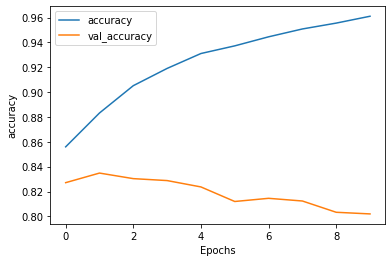

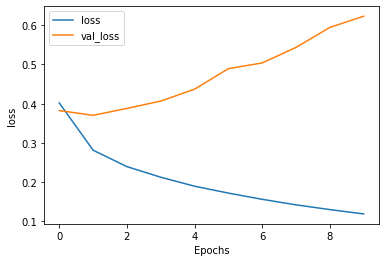

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
  plt.plot(hist.history[string])
  plt.plot(hist.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')